In [1]:
import numpy as np

In [2]:

a= [1.650531380456179,\
2.60938028927660,\
2.07667560486308,\
1.208548141770300,\
39.6855598532013,\
39.61156576520329,\
4.67688589997118,\
4.83291965108656,\
32.97728607920904,\
32.7519975396478,\
30.19750541636486,\
30.34421186098718,\
11.472331660468,\
26.29626408605123,\
17.64282544907857,\
11.76026783825076,\
63.4091584281148,\
47.2045116655465,\
139.4148172175685,\
122.2860679438009,\
186.355857276569,\
79.9658680483702,\
62.4149606871470,\
53.9060669079664,\
45.2740312592760,\
39.6658920298774,\
137.234043588360,\
116.0647558075650,\
127.0366977310961,\
36.42285410565758,\
86.0228179626023,\
87.3285445826584,\
98.836168523175,\
104.1102222664921,\
97.7319694738852,\
43.3547753099393,\
43.08291538174215,\
55.5729856753309,\
55.3616352343542,\
67.9493215328467,\
173.7191606218180,\
191.7791454151816,\
31.18243344900797,\
228.336459524536,\
193.3629697864189,\
33.81592026667619,\
18.0499239325822,\
35.7705108326246,\
22.49575400276294,\
19.78698375519560,\
9.46971157317606,\
24.60159805953296,\
21.23045030765358,\
21.8925377026343,\
26.28373602975913,\
6.50743045439935,\
13.96912605555578,\
65.8788896131108,\
51.4320697449970,\
31.89267651236337,\
30.2426180094098,\
17.39296213903969,\
14.40884597126299,\
93.046196006886,\
92.9761193687049,\
6.20712829439936,\
5.98050195939920,\
7.88569989772381,\
7.95211068221367,\
9.28993195098153,\
25.81625680423629,\
27.7337389216058,\
5.14682331341662,\
6.433945916473736,\
12.52469184854960,\
12.50478805003827,\
5.73436714872780,\
3.108931878043028,\
3.080154611465882,\
34.6199501921496,\
34.54912418465663,\
10.4030028015570,\
2.755376937738995,\
1.848392388360371,\
10.5477648634611,\
10.5290007171051,\
2.454914594520350,\
9.2581227027966,\
35.67160657809256,\
35.6753614582248,\
2.17405763203006,\
6.46653485306896,\
6.26766160434555,\
26.31332973066693,\
27.26124168489671,\
3.113016133045742,\
2.213366014232162,\
6.83199858274342,\
8.76349222400802,\
6.02747363198937,\
5.69077040089072,\
24.24364296779445,\
24.25084495890170,\
160.949106871324,\
163.612562709534,\
85.325218695648,\
83.6245714128508,\
117.667255370211,\
116.4828340891454,\
6.828759038893573,\
16.84568063306093,\
72.731389281956,\
63.68311157287591,\
5.03390269725188,\
6.34120709681653,\
6.64985559379420,\
4.9299334623800,\
6.90947435902305,\
6.47798231454149,\
2.125684880586798,\
1.410266922902240,\
3.90941144011178,\
17.73572899461334,\
17.81566480353408,\
1.981911504351264,\
192.2302982182914,\
192.329256396954,\
190.3896105680710,\
1542.25929515329,\
1771.688590217370,\
2305.551391514272,\
1153.083169603807,\
1368.284059519770,\
7680.5536629494,\
6829.31019136348,\
1085.440106555307,\
3877.777902879354,\
3320.425568359914,\
2803.18498310335,\
4537.75482894734,\
1862.395011250362,\
2671.511999943001,\
156.824518355199,\
25.15147696119712,\
23.9542506543287,\
50.9896881344294,\
51.0317430695956,\
6.35871597688199,\
5.40498016077682,\
2.038574375581306,\
39.9980909260808,\
39.9737951148004,\
1.594994252676767,\
1.507468181708905,\
2.524681494876159,\
2.29064924201894,\
2.27457630114941,\
2.572117366147226,\
1.64424681439720,\
6.76005712665620,\
7.17652038441470,\
1.43734886607317,\
1.446412471320871,\
0.958609661115322,\
2.732385391524251,\
2.62663783066791,\
1.989788004830888,\
11.60750480296692,\
9.1015729474108,\
4.66547374800483,\
6.56887580852581,\
6.583786357824199,\
5.76532604740979,\
8.24770374312894,\
50.5634484149344,\
45.5640822911717,\
51.6652810374083,\
50.8101029533055,\
142.9334706492040,\
112.8903645048471,\
53.36499128158630,\
35.6746694558935,\
32.65196270458644,\
31.15387948040159,\
50.5649872496507,\
50.53261341409907,\
8.47253194756783,\
7.9529875087387,\
4.2704838613374,\
6.249920264007684,\
7.00151422280891,\
6.4919241668432,\
25.19191045477457,\
54.58518143628441,\
61.19737981128887,\
61.1856410583620,\
132.069179354392,\
116.2282653180774,\
17.20573099447433,\
3.908974232168920,\
1.617308721971427,\
3.176385195537303,\
5.81810361299412,\
4.94413196876738,\
2.834913074522371,\
24.22768246004553,\
24.7238574109028,\
5.30266407913183,\
38.5914832475898,\
48.0661306116660,\
63.6244397106952,\
14.53283151870773,\
24.08520007183632,\
21.8982631576865,\
9.98005254814569,\
7.71359629522781,\
4.94312840488180,\
4.10199992309271,\
3.97477301349378,\
2.91726072829237,\
8.33588283570412,\
8.2922460023922,\
52.3841356271403,\
43.176189342285,\
7.792553070699506,\
6.7140615870850,\
19.07417817276892,\
14.17168307756378,\
51.2523785426339,\
42.5998839116335,\
16.4630570898263,\
8.25328405706986,\
3.81615678889999,\
3.08318541451488,\
7.07004857643730,\
6.3174029618495,\
7.4486170832859,\
5.54163360908302,\
2.59425499428498]

In [3]:
a=[1.6505313804561799,\
2.609380289276604,\
2.076675604863088,\
1.2085481417703003,\
39.68555985320139,\
39.611565765203295,\
4.676885899971184,\
4.832919651086563,\
32.977286079209044,\
32.75199753964785,\
30.197505416364862,\
30.344211860987187,\
11.4723316604683,\
26.296264086051238,\
17.642825449078575,\
11.760267838250762,\
63.40915842811484,\
47.20451166554654,\
139.41481721756855,\
122.28606794380096,\
186.3558572765699,\
79.96586804837028,\
62.41496068714709,\
53.90606690796647,\
45.27403125927605,\
39.66589202987747,\
137.2340435883603,\
116.06475580756505,\
127.03669773109613,\
36.422854105657585,\
86.02281796260232,\
87.32854458265842,\
98.8361685231754,\
104.11022226649219,\
97.73196947388529,\
43.35477530993936,\
43.082915381742154,\
55.57298567533091,\
55.36163523435428,\
67.94932153284677,\
173.71916062181805,\
191.77914541518163,\
31.182433449007974,\
228.3364595245365,\
193.36296978641894,\
33.815920266676194,\
18.04992393258226,\
35.77051083262466,\
22.495754002762943,\
19.786983755195607,\
9.469711573176061,\
24.601598059532968,\
21.230450307653584,\
21.89253770263438,\
26.283736029759137,\
6.507430454399359,\
13.969126055555787,\
65.87888961311086,\
51.43206974499708,\
31.892676512363373,\
30.24261800940984,\
17.392962139039692,\
14.408845971262995,\
93.0461960068861,\
92.97611936870491,\
6.207128294399368,\
5.980501959399205,\
7.885699897723813,\
7.952110682213679,\
9.289931950981538,\
25.816256804236293,\
27.73373892160582,\
5.146823313416624,\
6.4339459164737365,\
12.524691848549605,\
12.504788050038275,\
5.734367148727808,\
3.1089318780430286,\
3.0801546114658827,\
34.61995019214964,\
34.549124184656634,\
10.40300280155709,\
2.7553769377389954,\
1.8483923883603717,\
10.54776486346112,\
10.52900071710515,\
2.4549145945203503,\
9.25812270279666,\
35.671606578092565,\
35.67536145822488,\
2.174057632030063,\
6.466534853068968,\
6.267661604345559,\
26.313329730666933,\
27.261241684896714,\
3.1130161330457424,\
2.2133660142321627,\
6.831998582743426,\
8.763492224008022,\
6.027473631989375,\
5.690770400890725,\
24.243642967794457,\
24.250844958901702,\
160.9491068713242,\
163.6125627095342,\
85.3252186956488,\
83.62457141285088,\
117.6672553702115,\
116.48283408914547,\
6.8287590388935735,\
16.845680633060937,\
72.7313892819569,\
63.683111572875916,\
5.033902697251884,\
6.341207096816534,\
6.649855593794205,\
4.92993346238004,\
6.909474359023053,\
6.477982314541492,\
2.1256848805867987,\
1.4102669229022404,\
3.909411440111789,\
17.735728994613343,\
17.815664803534087,\
1.9819115043512645,\
192.23029821829147]

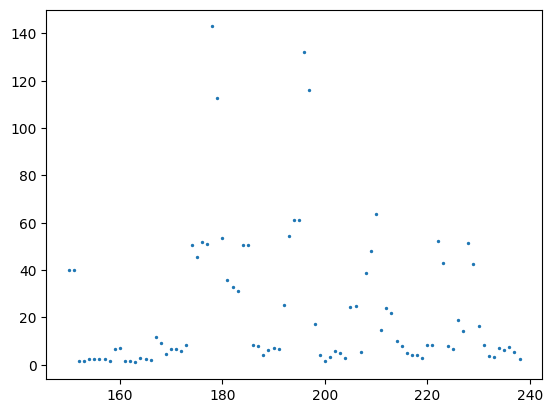

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(np.arange(150,len(a)),a[150:],s=2)
plt.show()

In [68]:

import re
def load_from_julia(filename):
    with open(filename,'r') as file:
        lines = file.readlines()
        for i in range(len(lines)):
            lines[i] = lines[i].split(";")
            
            j = 0
            while j< len(lines[i]):
                
                lines[i][j]= lines[i][j].strip(r' \n\t')
                print(lines[i][j],end='')
                if not re.search(r'^[0-9]+(.[0-9])?[0-9]*$',lines[i][j]):
                   print(True)
                   del lines[i][j]
                else:
                    print(False)
                    j+=1
            if not lines[i]:
                del lines[i]


    data = np.array(lines)
    print(data)
    print(data.shape)
    # if len(data.shape)==1:
    #     data = data[:-1]
    # elif len(data.shape)==2:
    #     data = data[:,:-1]
    return data

In [69]:
# k = load_from_julia('k_grid.txt').astype(np.float64)
# b = load_from_julia('b_grid.txt').astype(np.float64)
# data = load_from_julia('k_a_star.txt').astype(np.float64).transpose()
data = load_from_julia('m_n_star.txt').astype(np.float64).transpose()
# k.shape, b.shape,data.shape, k

0.00000False
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True
	0.00000True

In [64]:
a = '   0.9097'
a.strip(r' \n\t')


'0.9097'

In [24]:
ref = np.zeros_like(data)
for i in range(data.shape[0]):
    ref[i,:] = k[i]
    if np.max(data[i,:])<k[i]:
        print(k[i])

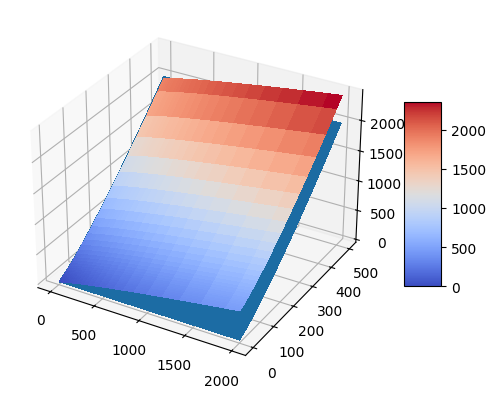

In [22]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.

K, B = np.meshgrid(k, b)


# Plot the surface.
surf = ax.plot_surface(K, B, data, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
surf2 = ax.plot_surface(K, B, ref,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


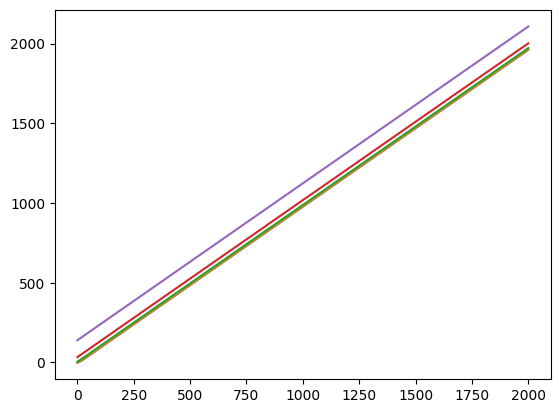

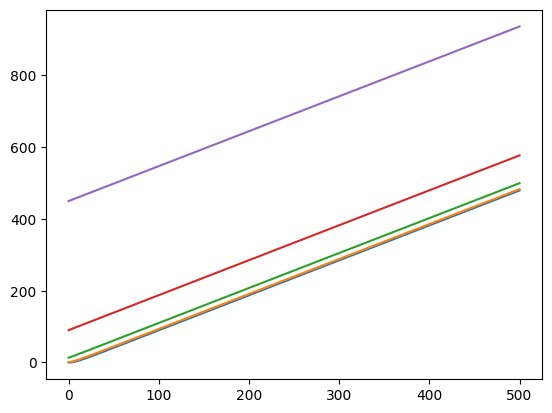

In [ ]:
steps = 20 
end = 100
fig1,ax1 = plt.subplots(1,1)
fig2, ax2 = plt.subplots(1,1)
for i in range(0,len(k),steps):
    ax1.plot(k[:end],data[:end,i])
    ax2.plot(b[:end],data[i,:end])

plt.show()